<center><h1> CANADIAN HEALTHCARE SYSTEM TWITTER ANALYSIS

- <b>Data collection:</b> Used a Twitter API to extract tweets about the Canadian healthcare system from the past year. 
- <b>Data cleaning:</b> Remove irrelevant tweets and non-English tweets, and perform standard text preprocessing techniques such as removing stop words and stemming/lemmatization. Also, removing hashtags, @mentions and hyperlinks

- <b>Sentiment analysis:</b> Use a pre-trained sentiment analysis model to classify the tweets as positive, negative, or neutral. we will use the NLTK library or other sentiment analysis tools.

- <b>Topic modeling:</b> Use a topic modeling technique such as Latent Dirichlet Allocation (LDA) to identify the main topics discussed in the tweets. we will use libraries such as Gensim or Scikit-learn for topic modeling.

- <b>Visualization:</b> Create visualizations such as word clouds, bar charts, and heatmaps to illustrate the results of our analysis. we will use Python visualization libraries such as Matplotlib, Seaborn, and Plotly for this purpose.

- <b>Interpretation:</b> Interpret the results of our analysis and draw conclusions about the public perception of the willadian healthcare system on Twitter. we will discuss the key topics, sentiments, and trends that emerged from our analysis.



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
import os
import json

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('punkt');

import re
from wordcloud import WordCloud, STOPWORDS 
import requests

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from string import punctuation
from collections import OrderedDict

import pyLDAvis
import pyLDAvis.gensim_models

import plotly.graph_objs as go
import plotly.express as px
# pd.options.plotting.backend = "plotly"
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

from data_cleaning import read_json_file


pyLDAvis.enable_notebook()
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/raphael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/raphael/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# read data from api
file_path = 'https://raw.githubusercontent.com/Beelzebub3122/Data-Competition-2023/main/data.json'
df = read_json_file(file_path)

In [3]:
# visualise
df.head(2)

Unnamed: 0            ID                       Date            User  \
0           0  1.624560e+18  2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18  2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count  
0           1  
1           0

### Basic Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9859 non-null   int64  
 1   ID              9859 non-null   float64
 2   Date            9859 non-null   object 
 3   User            9859 non-null   object 
 4   Tweet           9859 non-null   object 
 5   replyCount      9859 non-null   int64  
 6   lang            9859 non-null   object 
 7   Place           126 non-null    object 
 8   rendercontents  9859 non-null   object 
 9   Like_Count      9859 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 770.4+ KB


In [5]:
# convert date column to correct format
df['Date'] =  pd.to_datetime(df['Date'])

# make individual column for date and time
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
 10  Dates           9859 non-null   object             
 11  Time            9859 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(7)
memory usage: 924.4+ KB


<AxesSubplot:title={'center':'Time Series Analysis of Tweets'}>

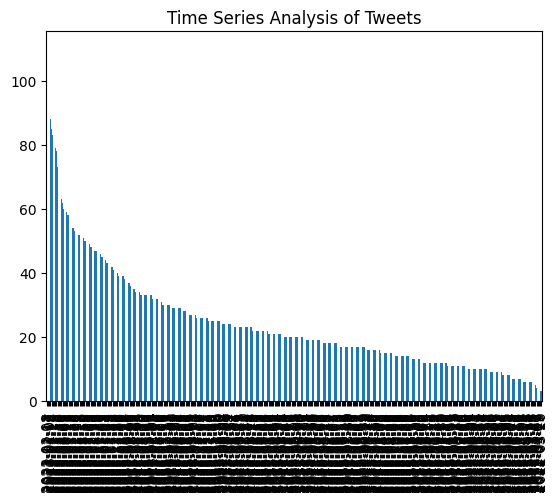

In [7]:

# visualize the time series 
df['Dates'].value_counts().plot(kind = 'bar', title = 'Time Series Analysis of Tweets')

In [8]:
date_prop = df['Dates'].value_counts()/len(df.Dates)*100

In [9]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
 10  Dates           9859 non-null   object             
 11  Time            9859 non-null   object             
 12  day             9859 non-null   int64              
 13  month           9859 non-null   i

In [11]:
df['year'].value_counts()/len(df.Dates)*100

2022    80.403692
2023    19.596308
Name: year, dtype: float64

<AxesSubplot:>

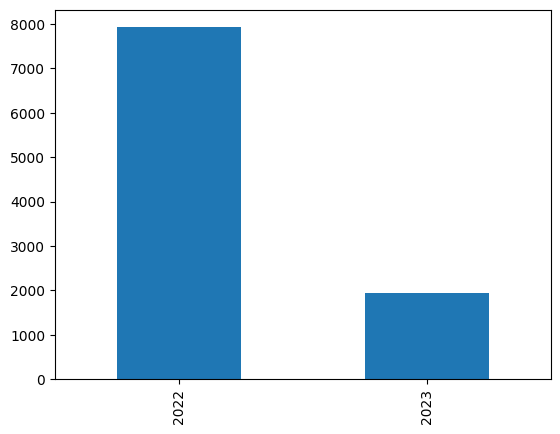

In [12]:
df['year'].value_counts().plot.bar()

In [13]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year  
0           1  2023-02-11  23:45:44   11      2  2023  
1           0  2023-02-11  23:32:45   11      2  2023

In [14]:
# create new colums to store # and @
df['Hashtags'] = df['Tweet'].str.findall(r'#.*?(?=\s|$)')
df['mentions'] = df['Tweet'].str.findall(r'[＠@]([^][\s#<>|{}]+)')

In [15]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]  
1                                   [tomcollins80, EdtheSock, babsy1234]

In [16]:
# create a new function to clean the tweets 
def remove_hashtags_usernames(tweet):
    # Use regex to match hashtags (starting with #) and usernames (starting with @)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    return tweet

cleaned_tweets = []
for tweet in df['Tweet']:
    cleaned_tweet = remove_hashtags_usernames(tweet)
    cleaned_tweet = re.sub('\W+',' ', cleaned_tweet )
    cleaned_tweets.append(cleaned_tweet)
    
df['cleaned_tweets'] = cleaned_tweets


In [17]:
# Create a stopword document
comment_words = '' 
add_stop = ['will','need','want','https', 'rt', 'healthcare', 'system', 'canadian','canada','canadians','the','in','is','it','on','amp','us','a','i','u','s','dont','t','re','don','m','ve', 'i','1', '2', '3', '4','5','6', '7', '8', '9','0']
stopwords = set(list(STOPWORDS)+add_stop)  


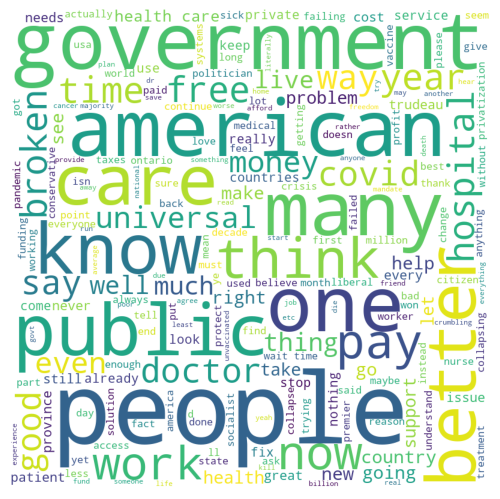

In [18]:
# Create a word cloud

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))

for val in df['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure( facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()



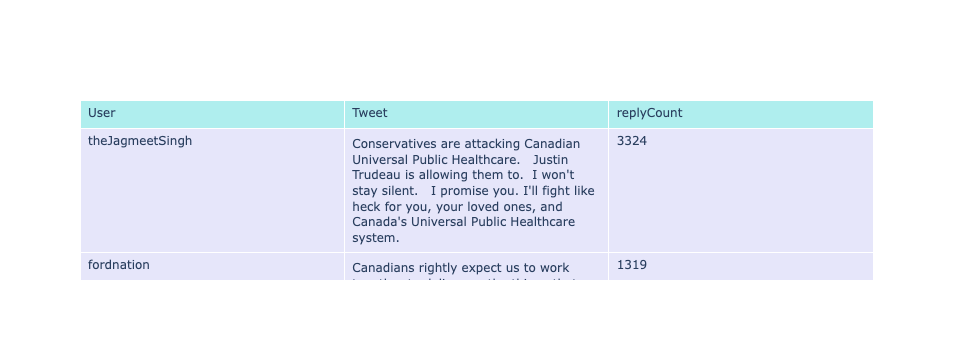

In [19]:
# create a plotly table to use on a website
grouped_df = df[['User','Tweet','replyCount']].sort_values(by = 'replyCount',ascending=False)[:10]
# grouped_df = pd.DataFrame(grouped_df.sort_values(ascending=False)[:10] ).reset_index()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(grouped_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=grouped_df.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))
])

fig.show()

In [20]:
# Define the sentiment objects using SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


sentiment_objects = [sia.polarity_scores(tweet) for tweet in df['cleaned_tweets']]



In [21]:
# look at an example
sentiment_objects[0]


{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.5859}

In [22]:
# Create a list of polarity values and tweet text

sentiment_values = [sentiment_object['compound'] for sentiment_object in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:2]


[-0.5859, -0.3182]

In [23]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity"])
sentiment_df.head()
df['polarity'] = sentiment_df['polarity']


In [24]:
# visaulise the table to check the update
df.head()


Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [25]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)


In [26]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

sentiment = []
# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        sentiment.append("Positive")
        pos=pos+1
    elif items<0:
        sentiment.append("Negative")
        neg=neg+1
    else:
        sentiment.append("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

4466 4388 1005


In [27]:
# create a new column called sentiment
df['Sentiment'] = sentiment


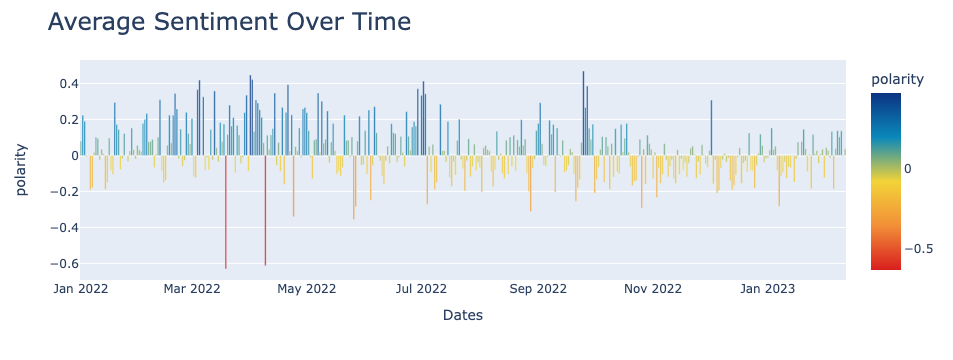

In [28]:

# Select the top 10 users
sent_series = df.groupby('Dates')['polarity'].mean().reset_index()

# Plot the data in a stacked bar chart
fig = px.bar(sent_series, x='Dates', y='polarity', color='polarity', color_continuous_scale='Portland_r')

# Update the layout of the chart
fig.update_layout(title={
    'text': "Average Sentiment Over Time",
    'font': {'size': 24}
})


fig.show()



In [29]:
table_sent_count = pd.crosstab(df['Dates'],df['Sentiment']).reset_index()
table_sent_count.head()


Sentiment       Dates  Negative  Neutral  Positive
0          2022-01-01         3        0         6
1          2022-01-02         5        0         9
2          2022-01-03        10        3        16
3          2022-01-04        14        5        14
4          2022-01-05        10        3        14

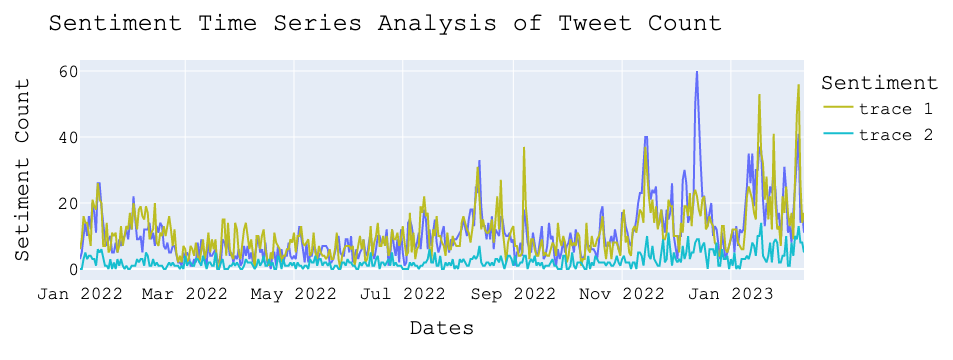

In [30]:
# Create Line plot
fig = px.line(table_sent_count, x=table_sent_count['Dates'], y=table_sent_count['Negative'])
fig.add_scatter(x=table_sent_count['Dates'], y=table_sent_count['Positive'])
fig.add_scatter(x=table_sent_count['Dates'], y=table_sent_count['Neutral'])
fig.update_traces(textposition='top center')

fig.update_layout(colorway = ['#7f7f7f', '#bcbd22', '#17becf'],
    title="Sentiment Time Series Analysis of Tweet Count",
    xaxis_title="Dates",
    yaxis_title="Setiment Count",
    legend_title="Sentiment",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show()


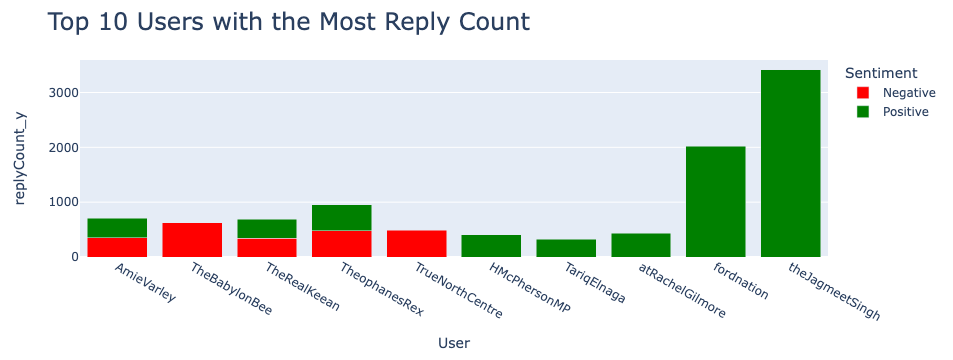

In [31]:
grouped_df = df.groupby(['User', 'Sentiment'])['replyCount'].sum().reset_index()

# Select the top 10 users
top_10_df = grouped_df.groupby('User').sum().sort_values(by='replyCount', ascending=False).reset_index().head(10)

# Merge the data with the original DataFrame to get the sentiment information
merged_df = pd.merge(grouped_df, top_10_df, on='User', how='inner')

# Remove the neutral sentiment
merged_df = merged_df[merged_df['Sentiment'] != 'Neutral']

# Plot the data in a stacked bar chart
fig = px.bar(merged_df, x='User', y='replyCount_y', color='Sentiment', barmode='stack', color_discrete_sequence=['red', 'green'])

# Update the layout of the chart
fig.update_layout(title={
    'text': "Top 10 Users with the Most Reply Count",
    'font': {'size': 24}
})


fig.show()

In [32]:
merged_df.head()

User Sentiment  replyCount_x  replyCount_y
0     AmieVarley  Negative             4           355
2     AmieVarley  Positive           347           355
3   HMcPhersonMP  Positive           407           407
4    TariqElnaga  Positive           327           327
5  TheBabylonBee  Negative           622           622

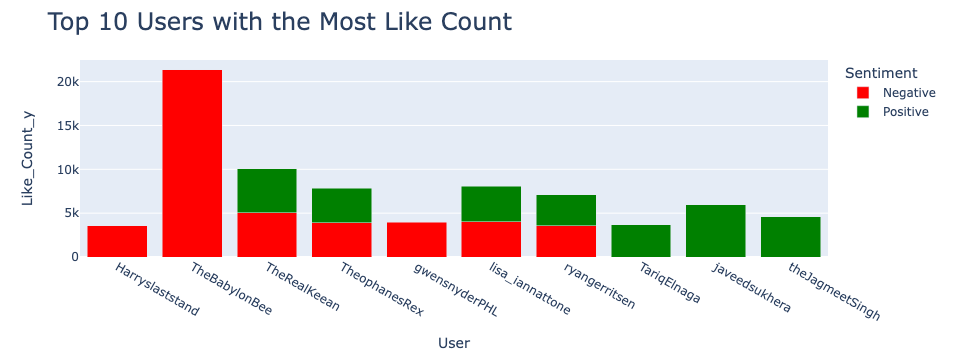

In [33]:
# Group the data by user and sum the Like for each user
grouped_df = df.groupby(['User', 'Sentiment'])['Like_Count'].sum().reset_index()

# Select the top 10 users
top_10_df = grouped_df.groupby('User').sum().sort_values(by='Like_Count', ascending=False).reset_index().head(10)

# Merge the data with the original DataFrame to get the sentiment information
merged_df = pd.merge(grouped_df, top_10_df, on='User', how='inner')

# Remove the neutral sentiment
merged_df = merged_df[merged_df['Sentiment'] != 'Neutral']

# Plot the data in a stacked bar chart
fig = px.bar(merged_df, x='User', y='Like_Count_y', color='Sentiment', barmode='stack', color_discrete_sequence=['red', 'green'])

# Update the layout of the chart
fig.update_layout(title={
    'text': "Top 10 Users with the Most Like Count",
    'font': {'size': 24}
})

# Show the chart
fig.show()

In [34]:
# split the sentance and liwer case it
e_words= [i.strip().lower().split(' ') for i in df['cleaned_tweets']]
e_words[2]



['no',
 'i',
 'said',
 'i',
 'trying',
 'canadian',
 'culture',
 'partner',
 'canadian',
 'escaping',
 'taxes',
 'third',
 'world',
 'cbc',
 'obvious',
 'hit',
 'piece',
 'anything',
 'liberal',
 'green',
 'ndp',
 'they',
 'afraid',
 'obscure',
 'quebec',
 'parties']

In [35]:
# use lemmarizing 
list_words = []
lemmatizer = WordNetLemmatizer()

for s in e_words:
    word = []
    for w in s:
        rootWord=lemmatizer.lemmatize(w)
        word.append(rootWord)
    list_words.append(word)
    
df['words'] = list_words
    

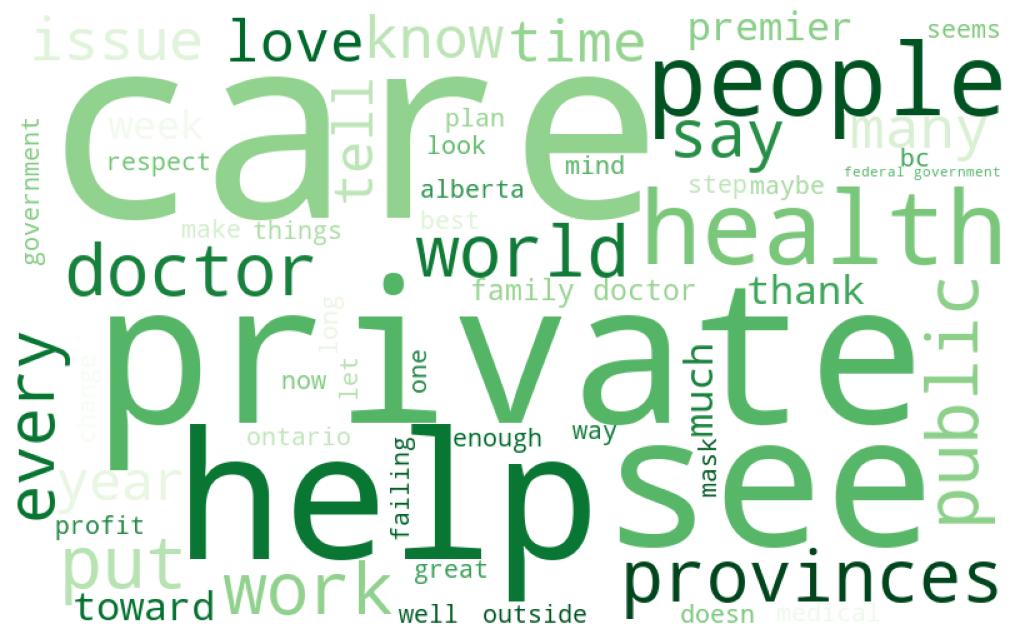

In [36]:
# create a word cloud for positive
df_pos = df.where(df["Sentiment"] == 'Positive')
df_pos.dropna(inplace = True)
comment_words_pos = ''
for val in df_pos['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_pos += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Greens',
                min_font_size = 10).generate(comment_words_pos)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


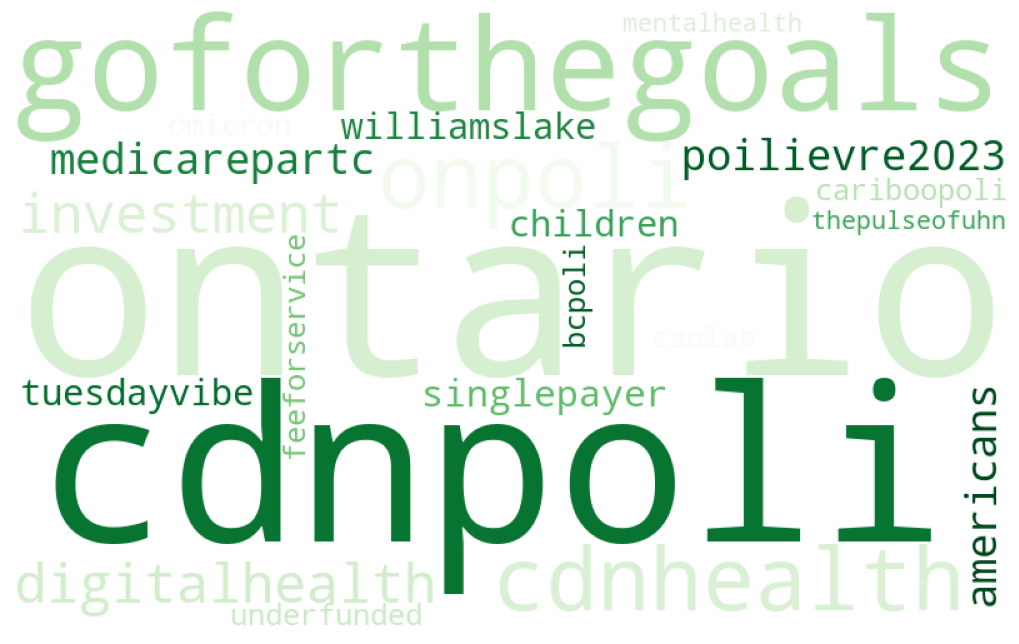

In [37]:
# create a word cloud for positive
df_pos = df.where(df["Sentiment"] == 'Positive')
df_pos.dropna(inplace = True)
hash_words_pos = ''
for val in df_pos['Hashtags']: 
      
    val = str(','.join(val))
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
      
    hash_words_pos += " ".join(tokens)+" "
  
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = list(stopwords),
                      colormap = 'Greens',
                min_font_size = 10).generate(hash_words_pos)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


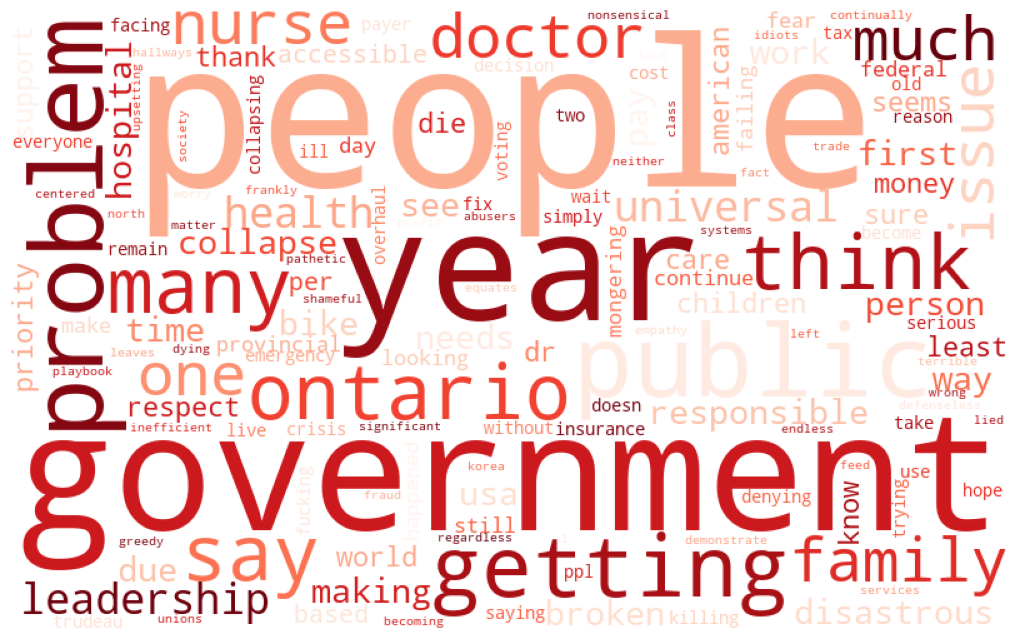

In [38]:
# create a negative 
df_neg = df.where(df["Sentiment"] == 'Negative')
df_neg.dropna(inplace = True)
comment_words_neg = ''
for val in df_neg['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_neg += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Reds',
                min_font_size = 10).generate(comment_words_neg)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


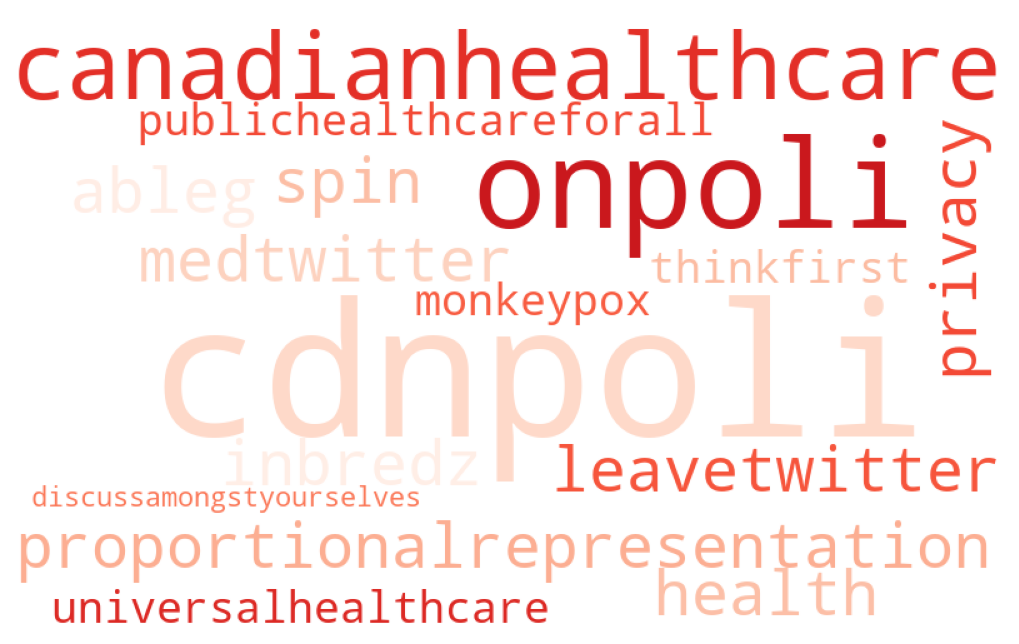

In [39]:
# create a negative 
df_neg = df.where(df["Sentiment"] == 'Negative')
df_neg.dropna(inplace = True)
hash_words_neg = ''
for val in df_neg['Hashtags']: 
      
    val = str(','.join(val))
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
      
    hash_words_neg += " ".join(tokens)+" "
  
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = list(stopwords),
                      colormap = 'Reds',
                min_font_size = 10).generate(hash_words_neg)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


## Topic Modelling

- <b>Create a document-term matrix:
</b> Create a document-term matrix using the text data. This matrix represents the number of times each word appears in each document.
<br>
+ <b>Apply TF-IDF:
</b>The second step is to apply TF-IDF (term frequency-inverse document frequency) to the document-term matrix. This helps to weight the words by how important they are in each document.
<br>
- <b>Train the LDA model:
</b> After applying TF-IDF, I will train the LDA (Latent Dirichlet Allocation) model on the document-term matrix. The LDA model is a type of unsupervised learning algorithm that can identify the underlying topics in the text data.
<br>
- <b>Evaluate the model:
</b> Once the LDA model is trained, I will evaluate it by calculating the coherence score. This score measures how well the topics are separated and how coherent the words in each topic are.
<br>
- <b>Interpret the topics:
</b> Finally, I will interpret the topics by examining the most common words in each topic and assigning a label or theme to each topic based on the words

In [40]:
# create a corpus of clean bag of words to develop a model
corpus_og=[]
cleaned_words_c = []
a=[]
for i in range(len(df['words'])):
    a = [word for word in df['words'][i] if word not in stopwords]
    corpus_og.append(' '.join(a))
    cleaned_words_c.append(a)
corpus_og[0]


'bullshit never met brit willingly trade private insurance wait see doctor doesn come side bankruptcy health insurance med bill'

In [41]:
# add to the original dataframe
df['cleaned_words']=corpus_og
df['cleaned_words_c']=cleaned_words_c
df.head()


Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [42]:
# create a temp folder to build the model into
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T" will be used to save temporary dictionary and corpus.


In [43]:
# create a file and store it to the folder
texts = df['cleaned_words_c']

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference


2023-02-18 09:20:42,311 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-02-18 09:20:42,597 : INFO : built Dictionary(12362 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'come']...) from 9859 documents (total 136606 corpus positions)
2023-02-18 09:20:42,622 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12362 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'come']...) from 9859 documents (total 136606 corpus positions)", 'datetime': '2023-02-18T09:20:42.598094', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2023-02-18 09:20:42,634 : INFO : Dictionary lifecycle event {'fname_or_handle': '/var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-02-18T09:20:42.634377', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n

In [44]:
# create a file and store it to the folder
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use


2023-02-18 09:20:42,839 : INFO : storing corpus in Matrix Market format to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-18 09:20:42,857 : INFO : saving sparse matrix to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-18 09:20:42,860 : INFO : PROGRESS: saving document #0
2023-02-18 09:20:42,908 : INFO : PROGRESS: saving document #1000
2023-02-18 09:20:42,945 : INFO : PROGRESS: saving document #2000
2023-02-18 09:20:42,982 : INFO : PROGRESS: saving document #3000
2023-02-18 09:20:43,021 : INFO : PROGRESS: saving document #4000
2023-02-18 09:20:43,063 : INFO : PROGRESS: saving document #5000
2023-02-18 09:20:43,096 : INFO : PROGRESS: saving document #6000
2023-02-18 09:20:43,126 : INFO : PROGRESS: saving document #7000
2023-02-18 09:20:43,160 : INFO : PROGRESS: saving document #8000
2023-02-18 09:20:43,198 : INFO : PROGRESS: saving document #9000
2023-02-18 09:20:43,238 : INFO : saved 9859x12362 matrix, density=0.108% (131214/121876958)
2023-02-18 09:2

In [45]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model


2023-02-18 09:20:43,263 : INFO : collecting document frequencies
2023-02-18 09:20:43,265 : INFO : PROGRESS: processing document #0
2023-02-18 09:20:43,367 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9859 documents and 12362 features (131214 matrix non-zeros)', 'datetime': '2023-02-18T09:20:43.367415', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [46]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors


In [47]:
# initialize the number of keywords
total_topics = 5


In [48]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


2023-02-18 09:20:43,407 : INFO : using symmetric alpha at 0.2
2023-02-18 09:20:43,421 : INFO : using symmetric eta at 0.2
2023-02-18 09:20:43,437 : INFO : using serial LDA version on this node
2023-02-18 09:20:43,448 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 9859 documents, updating model once every 2000 documents, evaluating perplexity every 9859 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-18 09:20:43,449 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-02-18 09:20:43,450 : INFO : PROGRESS: pass 0, at document #2000/9859
2023-02-18 09:20:44,782 : INFO : merging changes from 2000 documents into a model of 9859 documents
2023-02-18 09:20:44,791 : INFO : topic #0 (0.200): 0.008*"health" + 0.007*"public" + 0.007*"universal" + 0.006*"pay" + 0.005*"year" + 0.005*"better" + 0.005*"private" + 0.005*"tax" + 0.005*"world"

In [49]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)


[(0,
  '0.009*"free" + 0.008*"pay" + 0.008*"health" + 0.006*"year" + 0.006*"tax"'),
 (1,
  '0.008*"care" + 0.008*"people" + 0.007*"public" + 0.007*"right" + 0.007*"government"'),
 (2,
  '0.006*"broken" + 0.006*"people" + 0.006*"government" + 0.006*"now" + 0.006*"go"'),
 (3,
  '0.012*"health" + 0.011*"care" + 0.009*"people" + 0.008*"covid" + 0.007*"year"'),
 (4,
  '0.010*"people" + 0.009*"better" + 0.009*"american" + 0.008*"care" + 0.007*"much"')]

In [50]:
# store the data there
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}


In [51]:
# looking at the shape of the feature data set
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)


(5, 68)


In [52]:
# view the dataset
df_lda.head()


free       pay    health      year       tax        le  universal  \
0  0.00942  0.008340  0.007636  0.005727  0.005628  0.005344   0.005291   
1  0.00000  0.000000  0.004445  0.004338  0.000000  0.000000   0.000000   
2  0.00000  0.003878  0.000000  0.000000  0.000000  0.000000   0.000000   
3  0.00000  0.003422  0.011536  0.007290  0.000000  0.000000   0.003868   
4  0.00000  0.003481  0.006266  0.005407  0.004403  0.000000   0.000000   

       care      time      much   mandate      make     think      cost  \
0  0.005266  0.005152  0.004840  0.004819  0.004562  0.004546  0.004186   
1  0.007808  0.004932  0.000000  0.000000  0.000000  0.003373  0.000000   
2  0.000000  0.005172  0.000000  0.000000  0.003881  0.000000  0.000000   
3  0.011161  0.005809  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.007904  0.000000  0.007296  0.000000  0.000000  0.004088  0.004939   

      covid       one    better  government       say    public  american  \
0  0.004160  0.004129  0.003954    0.003899  0.003875  0.003868  0.003836   
1  0.003130  0.004346  0.000000    0.006721  0.000000  0.007032  0.005403   
2  0.000000  0.000000  0.000000    0.005897  0.000000  0.000000  0.000000   
3  0.008355  0.005847  0.000000    0.006709  0.000000  0.000000  0.000000   
4  0.003652  0.004761  0.009313    0.000000  0.004136  0.000000  0.008678   

      visit      wait  pandemic       now    people     right    doctor  \
0  0.003665  0.003649  0.003621  0.003526  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.005488  0.007533  0.007010  0.006651   
2  0.000000  0.003579  0.000000  0.005761  0.006237  0.003508  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.008711  0.003773  0.002833   
4  0.000000  0.000000  0.000000  0.000000  0.010264  0.000000  0.000000   

   hospital      work      many     help    family     every  support  \
0  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.00000   
1  0.006149  0.005177  0.005103  0.00507  0.004749  0.004531  0.00406   
2  0.000000  0.004060  0.003988  0.00000  0.000000  0.000000  0.00000   
3  0.000000  0.003229  0.005483  0.00000  0.000000  0.002932  0.00000   
4  0.000000  0.000000  0.005168  0.00000  0.000000  0.000000  0.00000   

       take      well   country      know    broken        go  private  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1  0.003634  0.003533  0.003456  0.003323  0.000000  0.000000  0.00000   
2  0.000000  0.000000  0.004521  0.004191  0.006476  0.005753  0.00466   
3  0.000000  0.000000  0.005051  0.000000  0.000000  0.000000  0.00000   
4  0.000000  0.000000  0.004505  0.005617  0.000000  0.000000  0.00000   

        see     thing       way  problem      love      even      save  \
0  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
2  0.004411  0.004339  0.004197  0.00419  0.004063  0.004057  0.004045   
3  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

        isn      life      back     world  vaccinated   freedom      best  \
0  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000   
2  0.003962  0.003787  0.003597  0.000000    0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.006107    0.005525  0.004659  0.004153   
4  0.000000  0.003497  0.000000  0.000000    0.000000  0.000000  0.000000   

      issue  collapse  treatment   mental  lockdown      good     never  \
0  0.000000  0.000000   0.000000  0.00000  0.000000  0.000000  0.000000   
1  0.000000  0.000000   0.000000  0.00000  0.000000  0.000000  0.000000   
2  0.000000  0.000000   0.000000  0.00000  0.000000  0.000000  0.000000   
3  0.003498  0.003448   0.003087  0.00301  0.002822  0.000000  0.000000   
4  0.000000  0.000000  

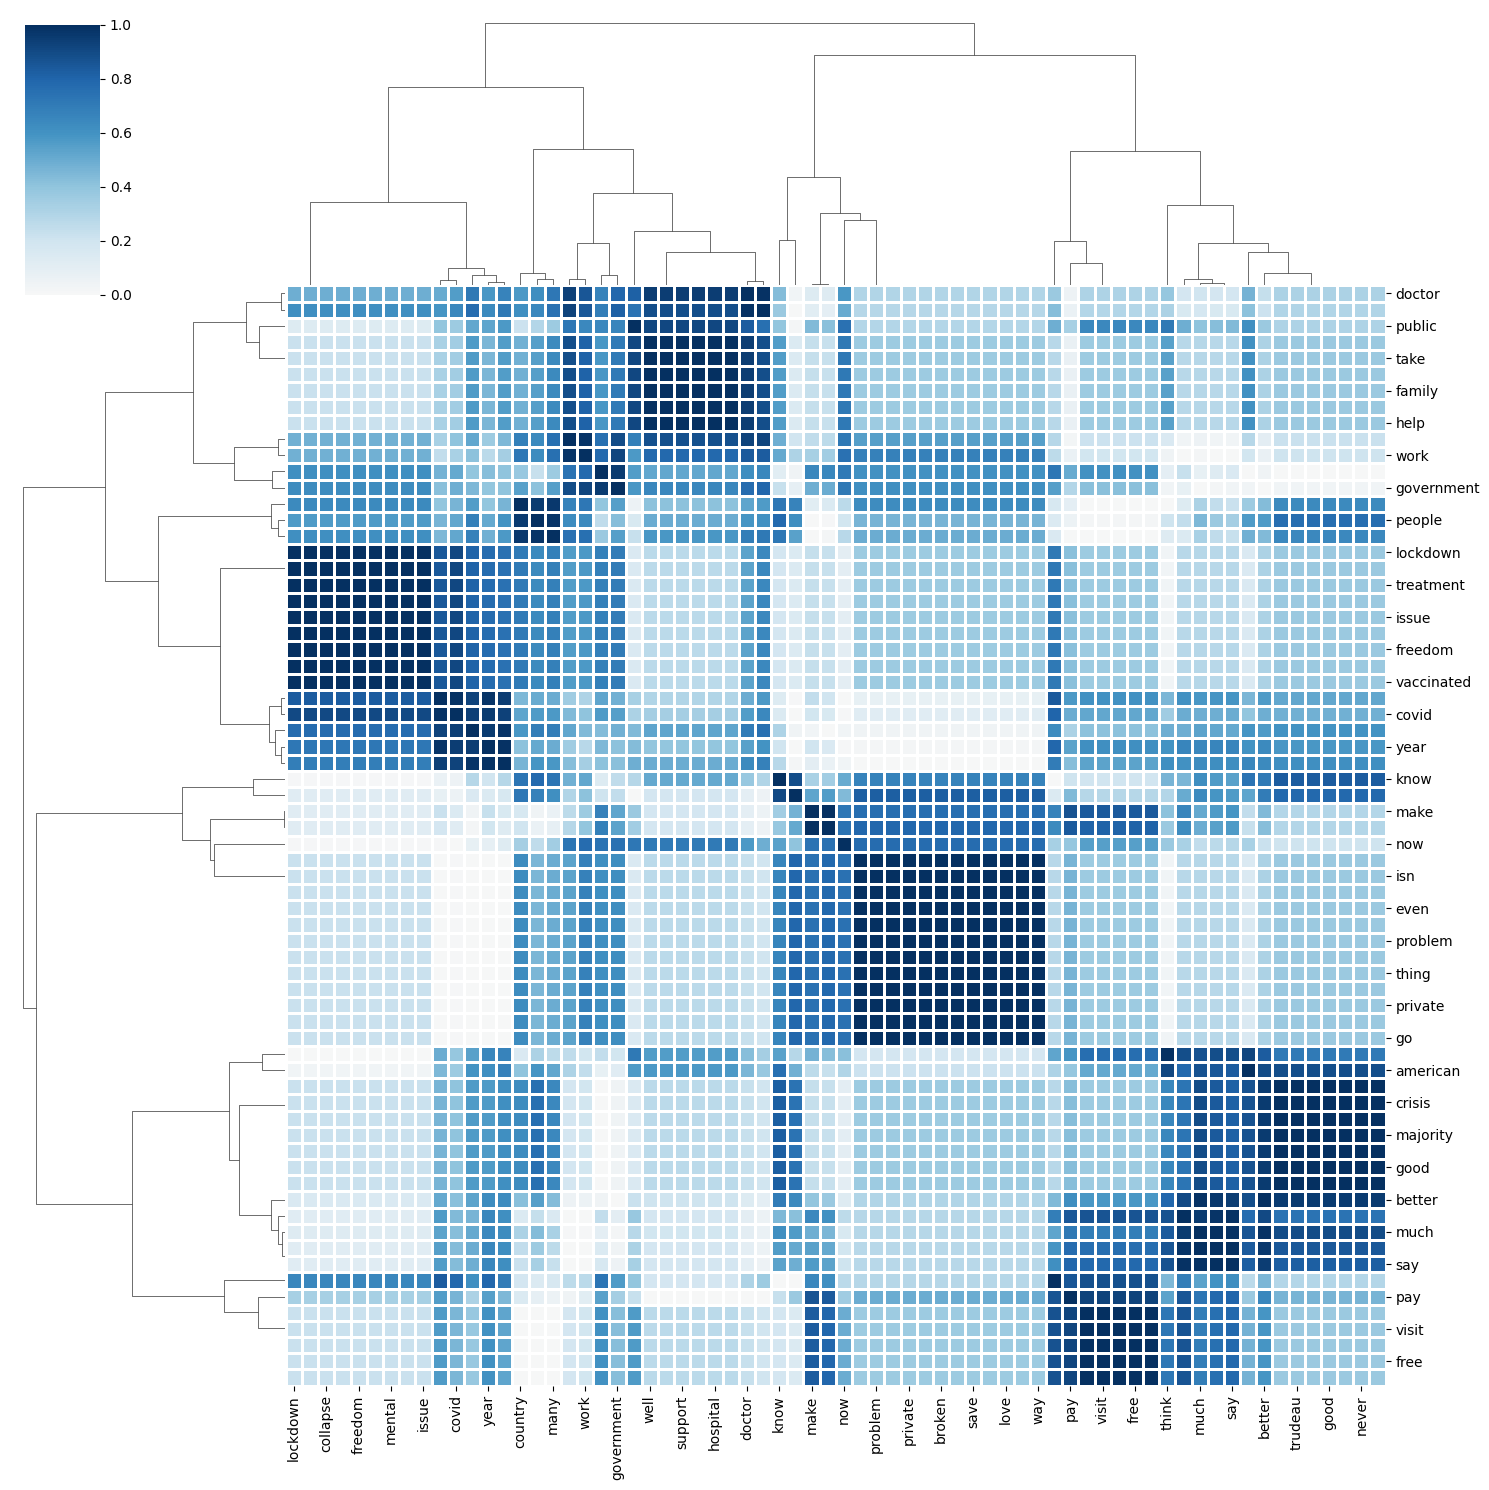

In [53]:
# visualise the correlation between words
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()



In [54]:
# visualize the topics 
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  31.165865
4       51.163364 -159.968018       2        1  30.618377
3      -73.144554   21.523815       3        1  17.900872
1      -66.410133 -110.606438       4        1  10.209367
0       54.417324   12.443444       5        1  10.105519, topic_info=                 Term       Freq      Total Category  logprob  loglift
7              health  54.000000  54.000000  Default  30.0000  30.0000
368              care  61.000000  61.000000  Default  29.0000  29.0000
414              free  29.000000  29.000000  Default  28.0000  28.0000
2030       vaccinated   9.000000   9.000000  Default  27.0000  27.0000
27               much  32.000000  32.000000  Default  26.0000  26.0000
136             right  27.000000  27.000000  Default  25.0000  25.0000
87                pay  38.000000  38.000000  Default  24.0000  24.0000
313                le  12.000000  12.000000  Default  23.0000  23.0000
34              world  19.000000  19.000000  Default  22.0000  22.0000
389             covid  37.000000  37.000000  Default  21.0000  21.0000
383            public  35.000000  35.000000  Default  20.0000  20.0000
983           freedom  10.000000  10.000000  Default  19.0000  19.0000
5              doctor  28.000000  28.000000  Default  18.0000  18.0000
68               time  41.000000  41.000000  Default  17.0000  17.0000
1240          mandate  12.000000  12.000000  Default  16.0000  16.0000
113        government  50.000000  50.000000  Default  15.0000  15.0000
121              year  48.000000  48.000000  Default  14.0000  14.0000
451              cost  24.000000  24.000000  Default  13.0000  13.0000
1221           family  14.000000  14.000000  Default  12.0000  12.0000
4538            virus   8.000000   8.000000  Default  11.0000  11.0000
186          hospital  30.000000  30.000000  Default  10.0000  10.0000
431               now  37.000000  37.000000  Default   9.0000   9.0000
2849         lockdown   5.000000   5.000000  Default   8.0000   8.0000
744              help  22.000000  22.000000  Default   7.0000   7.0000
311            better  44.000000  44.000000  Default   6.0000   6.0000
2522            visit   4.000000   4.000000  Default   5.0000   5.0000
118         universal  29.000000  29.000000  Default   4.0000   4.0000
864          american  50.000000  50.000000  Default   3.0000   3.0000
49                tax  32.000000  32.000000  Default   2.0000   2.0000
1005          support  16.000000  16.000000  Default   1.0000   1.0000
2686           forced   5.544919   5.589991   Topic1  -6.3174   1.1578
4538            virus   8.089443   8.168798   Topic1  -5.9397   1.1561
3810        caregiver   3.488874   3.533456   Topic1  -6.7807   1.1531
502             larry   3.422589   3.467569   Topic1  -6.7999   1.1528
3555      considering   3.429487   3.474875   Topic1  -6.7979   1.1527
5122           severe   3.335824   3.384348   Topic1  -6.8256   1.1514
4811          reading   3.001312   3.046513   Topic1  -6.9312   1.1509
3424           return   2.983088   3.028795   Topic1  -6.9373   1.1506
4570           minute   2.722904   2.767798   Topic1  -7.0286   1.1495
3093          compare   3.698389   3.759678   Topic1  -6.7224   1.1494
4351            night   2.500845   2.549878   Topic1  -7.1137   1.1464
4585       inadequate   2.297306   2.343163   Topic1  -7.1986   1.1461
2430          managed   3.595510   3.668486   Topic1  -6.7506   1.1458
1067        sacrifice   2.233846   2.281174   Topic1  -7.2266   1.1449
6868        influence   2.144002   2.195186   Topic1  -7.2676   1.1423
4066          parking   1.884290   1.929411   Topic1  -7.3967   1.1422
5105          minimum   1.858393   1.903915   Topic1  -7.4106   1.1416
3732             slow   2.260771   2.318260   Topic1  -7.2146   1.1407
3725           toward   1.788389   1.834907   Topic1  -7.4490   1.1402
1

### Topic

In [57]:
# looking at the top 10 keywords each topic 

num_topics = lda.num_topics
num_words = 10

for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = lda.show_topic(i, num_words)
    print([word for word, prob in topic_words])


Topic 0:
['people', 'pay', 'american', 'private', 'better', 'public', 'much', 'health', 'know', 'well']
Topic 1:
['covid', 'government', 'health', 'year', 'care', 'people', 'doctor', 'hospital', 'mandate', 'help']
Topic 2:
['tax', 'money', 'people', 'universal', 'public', 'time', 'health', 'year', 'country', 'government']
Topic 3:
['care', 'american', 'year', 'better', 'time', 'one', 'wait', 'right', 'now', 'many']
Topic 4:
['free', 'people', 'many', 'right', 'health', 'go', 'know', 'freedom', 'life', 'country']


In [58]:
# createing a df to store topong and keywords
num_topics = lda.num_topics
num_words = 30
lambda_value = 0.5

topic_word_dict = {}
for i in range(num_topics):
    topic_words = lda.show_topic(i, num_words)
    word_list = [word for word, prob in topic_words]
    prob_list = [prob for word, prob in topic_words]
    adjusted_prob_list = [(1 - lambda_value) * prob + lambda_value * (1/num_topics) for prob in prob_list]
    topic_word_dict[f"Topic {i}"] = word_list
    
df_topic_pred = pd.DataFrame(topic_word_dict)
df_topic_pred
    

Topic 0     Topic 1       Topic 2   Topic 3     Topic 4
0       people       covid           tax      care        free
1          pay  government         money  american      people
2     american      health        people      year        many
3      private        year     universal    better       right
4       better        care        public      time      health
5       public      people          time       one          go
6         much      doctor        health      wait        know
7       health    hospital          year     right     freedom
8         know     mandate       country       now        life
9         well        help    government      many     country
10         way    pandemic           one      take        good
11       thing        many           let      even       never
12       think         now           pay     world    american
13         one        long        change    health        care
14  government        time        dollar     think     medical
15     problem       every       billion       new  government
16     country   universal  conservative      best         one
17        care      access       trudeau      work         see
18        many         see         going    family       issue
19        make      public      province     great        save
20         say     protect          stop      good         bad
21        free  vaccinated       liberal   getting       state
22        time         due           say    people       great
23         isn     medical          give      know        cost
24        work          go         payer       put      better
25       issue         one         every     thing        much
26        fact     vaccine           put      come        work
27    hospital     patient          cost   country    hospital
28        good     country         right     covid        even
29       point   treatment          real      look         now

#### Topic renaming using GPT-3 Language Modeling based on top 10 keywords 
- Topic 0: Politics and Public Opinion
- Topic 1: Healthcare Access and Treatment
- Topic 2: Government and Healthcare Funding
- Topic 3: COVID-19 Pandemic and Vaccination
- Topic 4: Healthcare Costs and Taxes

In [59]:
# assume your topic names are stored in a list called "topic_names"
topic_names = ['Politics and Public Opinion', 'Healthcare Access and Treatment', 'Government and Healthcare Funding', 'COVID-19 Pandemic and Vaccination', 'Healthcare Costs and Taxes']

# rename the columns to the topic names
df_topic_pred = df_topic_pred.rename(columns={f"Topic {i}": topic_names[i] for i in range(len(topic_names))})

<h2>Topic assignment using trained LDA model with TF-IDF in Python</h2>

<ul>
  <li>Import the necessary libraries: <code>sklearn.feature_extraction.text.CountVectorizer</code> and <code>gensim.corpora.Dictionary</code>.</li>
  <li>Instantiate a CountVectorizer object.</li>
  <li>Fit and transform the cleaned text data to create a document-term matrix using the CountVectorizer object.</li>
  <li>Convert the document-term matrix to a Pandas dataframe.</li>
  <li>Create a Bag-of-Words (BoW) corpus using the cleaned text data.</li>
  <li>Instantiate an LDA model and train it on the BoW corpus using the gensim library.</li>
  <li>Get the topic distribution for each document in the corpus using the LDA model.</li>
  <li>Extract the topic with the highest probability for each document.</li>
  <li>Add the topic column to the original dataframe.</li>
</ul>

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary

vectorizer = CountVectorizer()
# fit and transform the cleaned_words_c column to create a document-term matrix
doc_term_matrix = vectorizer.fit_transform(df['cleaned_words_c'].apply(lambda x: ' '.join(x)))

# convert the document-term matrix to a pandas dataframe
doc_term_df = pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names())

bow_corpus = [dictionary.doc2bow(tweet) for tweet in df['cleaned_words_c']]

# create an LDA model and train it on the bag-of-words corpus
lda = LdaModel(bow_corpus, num_topics=5, id2word=dictionary)

# get the topic distribution for each tweet
topic_distribution = lda.get_document_topics(bow_corpus)

# extract the topic with the highest probability for each tweet
topics = [max(topic, key=lambda x: x[1])[0] for topic in topic_distribution]

# add the topic column to the original dataframe
df['topic'] = topics


2023-02-18 09:15:09,478 : INFO : using symmetric alpha at 0.2
2023-02-18 09:15:09,534 : INFO : using symmetric eta at 0.2
2023-02-18 09:15:09,554 : INFO : using serial LDA version on this node
2023-02-18 09:15:09,586 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 9859 documents, updating model once every 2000 documents, evaluating perplexity every 9859 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-18 09:15:09,590 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-02-18 09:15:09,595 : INFO : PROGRESS: pass 0, at document #2000/9859
2023-02-18 09:15:11,543 : INFO : merging changes from 2000 documents into a model of 9859 documents
2023-02-18 09:15:11,548 : INFO : topic #0 (0.200): 0.011*"people" + 0.007*"year" + 0.007*"american" + 0.006*"broken" + 0.006*"know" + 0.006*"country" + 0.005*"government" + 0.005*"waiting" + 0.005

In [61]:
# create a dictionary to map topic numbers to their names
topic_dict = {
    0: 'Politics and Public Opinion',
    1: 'Healthcare Access and Treatment',
    2: 'Government and Healthcare Funding',
    3: 'COVID-19 Pandemic and Vaccination',
    4: 'Healthcare Costs and Taxes'
}

# apply the mapping to the current column using the map() function
df['topic'] = df['topic'].map(topic_dict)


In [62]:
# visualie the data frame
df.head(1)


Unnamed: 0            ID                      Date       User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00  lost_grrl   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   

   replyCount lang Place  \
0           3   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   

                                                                mentions  \
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]   

                                                                                                                                             cleaned_tweets  \
0  bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills   

   polarity Sentiment  \
0   -0.5859  Negative   

                                                                                                                                                                           words  \
0  [bullshit, i, never, met, canadian, brit, willingly, trade, private, insurance, u, wait, see, doctor, canada, doesn, come, side, bankruptcy, i, health, insurance, med, bill]   

                                                                                                                    cleaned_words  \
0  bullshit never met brit willingly trade private insurance wait see doctor doesn come side bankruptcy health insurance med bill   

                                                                                                                                      cleaned_words_c  \
0  [bullshit, never, met, brit, willingly, trade, private, insurance, wait, see, doctor, doesn, come, side, bankruptcy, health, insurance, med, bill]   

                               topic  
0  Government and Healthcare Funding

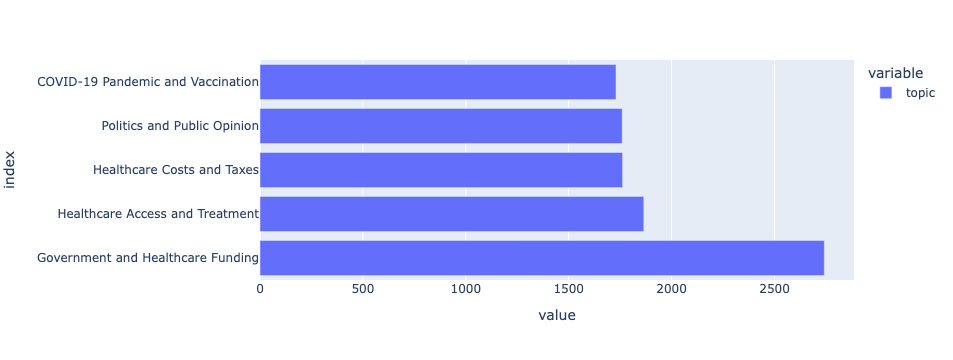

In [63]:
df['topic'].value_counts().plot(kind = 'barh')

In [64]:
# Group the data by user and sum the replyCount for each user
grouped_df_4 = df.groupby(['User','topic','Sentiment']).agg(
    meanReplyCount=('replyCount', np.mean),
    meanLike_Count=('Like_Count', np.mean)).reset_index()


In [65]:
use_count = pd.DataFrame(df['User'].value_counts().reset_index()).rename(columns = {'index': 'User', 'User':'Count'})
use_count.head()

User  Count
0   TheophanesRex     59
1  _I_Am_Canadian     26
2   Lost_Loyalist     24
3   wildtrailflow     21
4  Canadian_Dolly     20

In [66]:
# Merge the data with the original DataFrame to get the sentiment information
merged_df_4 = pd.merge(grouped_df_4, use_count, on='User', how='inner')
merged_df_4.head()


User                              topic Sentiment  meanReplyCount  \
0     01whipper  COVID-19 Pandemic and Vaccination  Positive             0.0   
1        01wise  Government and Healthcare Funding  Positive             0.0   
2    027Younger  COVID-19 Pandemic and Vaccination  Negative             0.0   
3  04KMacDonald  COVID-19 Pandemic and Vaccination  Positive             2.0   
4        07HDSB         Healthcare Costs and Taxes  Positive             0.0   

   meanLike_Count  Count  
0             0.0      1  
1             0.0      1  
2             0.0      1  
3             1.0      1  
4             0.0      2

In [68]:
df0 = pd.DataFrame(topic_term_dist[0][1])
df1 = pd.DataFrame(topic_term_dist[1][1])
df2 = pd.DataFrame(topic_term_dist[2][1])
df3 = pd.DataFrame(topic_term_dist[3][1])
df4 = pd.DataFrame(topic_term_dist[4][1])

frames = [df0,df1, df2, df3, df4]

result = pd.concat(frames).reset_index()

top_list = []
for j in topic_names:
    for i in range(10):
        top_list.append(j)
df5 = pd.DataFrame(top_list).rename(columns = {0:'Topic'})
df5 = pd.concat([result,df5], axis = 1)
df5

index           0         1                              Topic
0       0      people  0.012110        Politics and Public Opinion
1       1    american  0.011164        Politics and Public Opinion
2       2        free  0.008375        Politics and Public Opinion
3       3        year  0.007598        Politics and Public Opinion
4       4  vaccinated  0.006800        Politics and Public Opinion
5       5        know  0.005470        Politics and Public Opinion
6       6       right  0.005367        Politics and Public Opinion
7       7       every  0.005143        Politics and Public Opinion
8       8       covid  0.005032        Politics and Public Opinion
9       9         now  0.004675        Politics and Public Opinion
10      0      people  0.010039    Healthcare Access and Treatment
11      1        time  0.009007    Healthcare Access and Treatment
12      2         one  0.007953    Healthcare Access and Treatment
13      3   universal  0.006338    Healthcare Access and Treatment
14      4       never  0.005556    Healthcare Access and Treatment
15      5        wait  0.005541    Healthcare Access and Treatment
16      6      health  0.005024    Healthcare Access and Treatment
17      7        care  0.004908    Healthcare Access and Treatment
18      8        cost  0.004886    Healthcare Access and Treatment
19      9  government  0.004781    Healthcare Access and Treatment
20      0      health  0.012488  Government and Healthcare Funding
21      1        care  0.009605  Government and Healthcare Funding
22      2      better  0.009089  Government and Healthcare Funding
23      3       covid  0.007727  Government and Healthcare Funding
24      4      public  0.007184  Government and Healthcare Funding
25      5      people  0.006577  Government and Healthcare Funding
26      6     private  0.006260  Government and Healthcare Funding
27      7         pay  0.006018  Government and Healthcare Funding
28      8         one  0.005768  Government and Healthcare Funding
29      9        many  0.005501  Government and Healthcare Funding
30      0        care  0.014510  COVID-19 Pandemic and Vaccination
31      1  government  0.010099  COVID-19 Pandemic and Vaccination
32      2    american  0.006173  COVID-19 Pandemic and Vaccination
33      3    pandemic  0.005920  COVID-19 Pandemic and Vaccination
34      4        much  0.005812  COVID-19 Pandemic and Vaccination
35      5     country  0.005123  COVID-19 Pandemic and Vaccination
36      6         see  0.005012  COVID-19 Pandemic and Vaccination
37      7    hospital  0.004995  COVID-19 Pandemic and Vaccination
38      8      people  0.004938  COVID-19 Pandemic and Vaccination
39      9        year  0.004807  COVID-19 Pandemic and Vaccination
40      0        many  0.008331         Healthcare Costs and Taxes
41      1        year  0.008201         Healthcare Costs and Taxes
42      2       right  0.006520         Healthcare Costs and Taxes
43      3      health  0.006080         Healthcare Costs and Taxes
44      4      doctor  0.005326         Healthcare Costs and Taxes
45      5     mandate  0.005257         Healthcare Costs and Taxes
46      6  government  0.004780         Healthcare Costs and Taxes
47      7       issue  0.004560         Healthcare Costs and Taxes
48      8       covid  0.004544         Healthcare Costs and Taxes
49      9      people  0.004469         Healthcare Costs and Taxes

In [72]:
# df.groupby('Dates')['topic'].count()
grouped_df = df.groupby(['topic', 'Sentiment'])['ID'].count().reset_index()

# Remove the neutral sentiment
grouped_df = grouped_df[grouped_df['Sentiment'] != 'Neutral']
grouped_df
# Plot the data in a stacked bar chart
# fig = px.bar(grouped_df, x='topic', y='ID', color='Sentiment', barmode='stack', color_discrete_sequence=['red', 'green'])

# # Update the layout of the chart
# fig.update_layout(title={
#     'text': "Top 10 Users with the Most Reply Count",
#     'font': {'size': 24}
# })


# fig.show()

topic Sentiment    ID
0   COVID-19 Pandemic and Vaccination  Negative   699
2   COVID-19 Pandemic and Vaccination  Positive   842
3   Government and Healthcare Funding  Negative  1167
5   Government and Healthcare Funding  Positive  1336
6     Healthcare Access and Treatment  Negative   779
8     Healthcare Access and Treatment  Positive   893
9          Healthcare Costs and Taxes  Negative   836
11         Healthcare Costs and Taxes  Positive   743
12        Politics and Public Opinion  Negative   907
14        Politics and Public Opinion  Positive   652

### Overall sentiment:

>Mix of positive and negative sentiment
Users appreciate care from healthcare providers and private options
Concerns about public aspects of healthcare system and government's role in providing and funding healthcare
Possible business objective:

>Identify specific areas of healthcare system causing negative sentiment
Target resources towards improving these areas
Improve public perception of Canadian healthcare system 

In [ ]:
pyLDAvis.save_json(panel, 'tclda.json')
pyLDAvis.save_html(panel, 'tclda.html')

### assign names to particular topics
def add_topics_names(tlist, tnames, json_data):
    data1=json_data
    atop = len(data1['mdsDat']['topics'])
    assigned_names= np.arange(1, atop+1).tolist()
    for i,j in enumerate(tlist):
        assigned_names[j]=tnames[i]
    data1['mdsDat']['topic.names']=assigned_names
    return data1

#ldavis preffs
topics_to_name = [0,1,2,3,4]
topics_names = ['Politics and Public Opinion','Healthcare Access and Treatment','Government and Healthcare Funding','COVID-19 Pandemic and Vaccination','Healthcare Costs and Taxes']

#loading saved json file
with open('tclda1.json') as data_file:    
    data = json.load(data_file)
#Calling function change names
data=add_topics_names(topics_to_name, topics_names, data)
#save json file
with open('tclda.json', 'w') as fp:
    json.dump(data, fp)